<a href="https://colab.research.google.com/github/Yong-Hoon-In/-/blob/master/adp_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
df=pd.read_csv('/kaggle/input/adp-29data/raw.githubusercontent.com_Datamanim_datarepo_main_adp_29_p1.csv',encoding='cp949')

In [ ]:
from sklearn.model_selection import KFold,StratifiedKFold

In [ ]:
df

,순번,계약구분,재계약횟수,거주개월,아파트 이름,아파트 ID,아파트 평점,호실고유번호,층,평형대,...,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
0,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2008,47100,3646000,46,33,남,미혼,3,미퇴거
1,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2009,56500,4375000,46,34,남,미혼,3,미퇴거
2,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2010,56500,4375000,46,35,남,미혼,3,미퇴거
3,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2011,69900,5408000,46,36,남,미혼,3,미퇴거
4,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2012,69900,5408000,46,37,남,미혼,3,미퇴거
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86899,12882,해지,8,180,지산5단지아파트,3,8.0,86891,14,15,...,2018.0,2017,49500,3055000,60,56,남,기혼,2,미퇴거
86900,12882,해지,8,180,지산5단지아파트,3,8.0,86891,14,15,...,2018.0,2018,49500,3055000,60,57,남,기혼,2,퇴거
86901,12883,유효,2,36,지산5단지아파트,3,8.0,86891,14,15,...,NaN,2018,45000,2365000,52,49,남,미혼,1,미퇴거
86902,12883,유효,2,36,지산5단지아파트,3,8.0,86891,14,15,...,NaN,2019,45000,2365000,52,50,남,미혼,1,미퇴거


In [ ]:
kfold=KFold()

In [ ]:
kfold.split

False

In [ ]:
for train in kfold.split(df):
    print(train)


(array([17381, 17382, 17383, ..., 86901, 86902, 86903]), array([    0,     1,     2, ..., 17378, 17379, 17380]))
(array([    0,     1,     2, ..., 86901, 86902, 86903]), array([17381, 17382, 17383, ..., 34759, 34760, 34761]))
(array([    0,     1,     2, ..., 86901, 86902, 86903]), array([34762, 34763, 34764, ..., 52140, 52141, 52142]))
(array([    0,     1,     2, ..., 86901, 86902, 86903]), array([52143, 52144, 52145, ..., 69521, 69522, 69523]))
(array([    0,     1,     2, ..., 69521, 69522, 69523]), array([69524, 69525, 69526, ..., 86901, 86902, 86903]))


In [ ]:
df.head(1)

1-1 계약자고유번호를 기준으로 거주연도 별 여러개의 데이터가 쌓여 있다. 각 계약자고유번호에 대해 가장 최신의 거주연도 행만 남겨라.

In [ ]:
df['계약자고유번호'].nunique()

In [ ]:
e_df=pd.DataFrame()
for val in df['계약자고유번호'].unique():
    if len(df.loc[(df['거주연도']==(df[df['계약자고유번호']==val]['거주연도'].max()))&(df['계약자고유번호']==val)])>1:
        #print(df.loc[(df['거주연도']==(df[df['계약자고유번호']==val]['거주연도'].max()))&(df['계약자고유번호']==val)])
        e_df=pd.concat([e_df,df.loc[(df['거주연도']==(df[df['계약자고유번호']==val]['거주연도'].max()))&(df['계약자고유번호']==val)&(df['계약구분']=='해지')]])
    else :
        e_df=pd.concat([e_df,df.loc[(df['거주연도']==(df[df['계약자고유번호']==val]['거주연도'].max()))&(df['계약자고유번호']==val)]])
e_df.reset_index(inplace=True,drop=True)
df=e_df.copy()
len(e_df)

In [ ]:
#e_df2=df.sort_values(by='거주연도',ascending=False).drop_duplicates(subset='계약자고유번호')
#len(e_df2)

1-2 EDA 및 결측치 처리 (시각화 포함)

In [ ]:
df.isnull().mean()

In [ ]:
df.describe()

In [ ]:
df['계약구분'].fillna('유효',inplace=True)
df['아파트 평점'].fillna(df['아파트 평점'].median(),inplace=True)
df['퇴거여부']='N'
df.loc[df['퇴거연도'].isna()==False,'퇴거여부']='Y'
df.drop(columns='퇴거연도',inplace=True)
#df['아파트 이름'].fillna(df['아파트 이름'].mode(),inplace=True)

In [ ]:
num_cols=['순번','재계약횟수','거주개월','층','아파트 평점','평형대','거주연도', '월세(원)', '보증금(원)',
       '대표나이', '나이','거주자 수',]
cat_cols=['아파트 이름', '계약구분',   '입주연도','성별', '결혼여부',  '퇴거여부']
other_cols=[ '아파트 ID',  '호실고유번호','계약자고유번호','계약서고유번호',]

In [ ]:
fig,axs=plt.subplots(1,5,figsize=(10,3))
for col,ax in zip(cat_cols,axs.ravel()):
    #ax.hist(df[col])
    sns.countplot(data=df,x=col,ax=ax)
plt.show()

In [ ]:
fig,axs=plt.subplots(3,4,figsize=(10,7))
for col,ax in zip(num_cols,axs.ravel()):
    #ax.hist(df[col])
    sns.histplot(data=df,x=col,ax=ax)
plt.show()

In [ ]:
fig,axs=plt.subplots(3,4,figsize=(10,7))
for col,ax in zip(num_cols,axs.ravel()):
    #ax.hist(df[col])
    sns.histplot(data=df,x=col,ax=ax,hue='재계약횟수')
plt.show()

1-3

이상치 처리

In [ ]:
find_outlier_cols=['재계약횟수','거주개월','층','아파트 평점','평형대',
 '거주연도','월세(원)','보증금(원)','대표나이','나이','거주자 수']

In [ ]:
for col in num_cols:
    if col=='평형대':
        continue
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    upper=df[col].quantile(.75)+IQR*1.5
    lower=df[col].quantile(.25)-IQR*1.5
    if len(df.loc[df[col]>upper])>0 or len(df.loc[df[col]>lower])<0:
        print(col)
        print(f'number of {len(df.loc[df[col]>upper])} value to {upper} value ')
        df.loc[df[col]>upper,col]=upper
    if len(df.loc[df[col]>lower])<0:
        print(col)
        print(f'number of {len(df.loc[df[col]<lower])} value to {lower} value ')
        df.loc[df[col]<lower,col]=lower

2-1 재계약 횟수의 중앙값을 기준으로 중앙값보다 크거나 같으면 ‘높음’, 작으면 ‘낮음’ 으로 재계약 횟수 이분 변수를 구성하시오.

In [ ]:
df['재계약분류']=0
df.loc[df['재계약횟수']>=df['재계약횟수'].median(),'재계약분류']='높음'
df.loc[df['재계약횟수']<df['재계약횟수'].median(),'재계약분류']='낮음'
seg1=df[df['재계약분류']=='높음']
seg2=df[df['재계약분류']=='낮음']

2-2 차원축소의 필요성을 논하고, 필요에 따라 차원을 축소하고 불필요하다면 그 근거를 논하시오.

차원 축소의 필요성:
1. 고차원 데이터의 시각화: 고차원 데이터를 시각화하기는 어렵습니다. 2차원 또는 3차원 공간에서 시각화하는 것은 가능하지만, 데이터가 더 높은 차원에서 존재하는 경우 시각적 이해가 어려워집니다. 따라서 차원 축소를 통해 데이터를 2차원 또는 3차원으로 축소하여 시각화하는 것이 도움이 됩니다.

2. 차원의 저주 피하기: 차원이 증가하면 공간의 부피가 급격하게 증가하며, 고차원 데이터에서 필요한 데이터 포인트 수가 기하급수적으로 증가합니다. 이로 인해 모델을 학습하고 일반화하기 어려워집니다. 차원 축소를 통해 고차원 데이터에서 차원의 저주 문제를 완화할 수 있습니다.

3. 불필요한 정보 제거: 고차원 데이터에는 불필요한 정보나 노이즈가 포함될 수 있습니다. 차원 축소를 통해 중요한 특성을 강조하고 불필요한 특성을 제거하여 모델의 성능을 향상시킬 수 있습니다.

4. 모델 복잡성 감소: 고차원 데이터를 다루는 모델은 복잡하며, 모델 학습과 예측에 많은 계산 리소스가 필요합니다. 차원 축소를 통해 모델의 복잡성을 감소시키고 효율성을 향상시킬 수 있습니다.

차원 축소를 하지 않아야 하는 경우의 근거:

1. 정보 손실: 차원 축소는 데이터의 특성을 단순화하고 압축하는 과정입니다. 따라서 차원 축소를 하면 데이터의 일부 정보가 손실될 수 있습니다. 만약 중요한 정보가 손실되면 모델의 성능이 저하될 수 있습니다.

2. 낮은 차원: 데이터의 차원이 이미 낮은 경우에는 차원 축소가 필요하지 않을 수 있습니다. 예를 들어, 2차원 데이터를 다루는 경우에는 차원 축소가 필요하지 않을 수 있습니다.

3. 모델 성능 유지: 데이터의 차원이 높더라도 차원 축소 없이 모델을 학습하고 성능이 충분히 좋을 수 있습니다. 차원 축소를 하더라도 모델의 성능이 크게 향상되지 않는 경우에는 차원 축소를 수행할 필요가 없을 수 있습니다.

4. 해석 가능성: 데이터의 특성이 해석 가능해야 하는 경우에는 차원 축소가 정보 손실을 초래할 수 있으므로 주의해야 합니다.

차원 축소 불필요
1. sparse 컬럼 없음
2. 컬럼의 갯수가 열에 비해 많지않음(차원의 저주 생기지 않음)

In [ ]:
df_low=df[df['재계약분류']=='낮음']
df_high=df[df['재계약분류']=='높음']
print(len(df_low))
print(len(df_high))

NameError: name 'df' is not defined

In [ ]:
plt.figure(figsize=(4,4))
corr=df[find_outlier_cols].corr()
mask=np.triu(np.ones_like(corr))
sns.heatmap(corr,mask=mask,annot=True,fmt='0.1f')

NameError: name 'plt' is not defined

3-1 재계약 횟수 이분변수를 기준으로 세그먼트를 구분하고 각 세그먼트의 특징을 분석하시오.

In [ ]:
df_copy=df.copy()
#df=e_df.copy()

In [ ]:
df_low=df[df['재계약분류']=='낮음']
df_high=df[df['재계약분류']=='높음']

In [ ]:
df.columns

Index(['순번', '계약구분', '재계약횟수', '거주개월', '아파트 이름', '아파트 ID', '아파트 평점', '호실고유번호',
       '층', '평형대', '계약자고유번호', '계약서고유번호', '입주연도', '거주연도', '월세(원)', '보증금(원)',
       '대표나이', '나이', '성별', '결혼여부', '거주자 수', '퇴거여부', '재계약분류'],
      dtype='object')

In [ ]:
train_cat_cols=['계약구분','결혼여부', '성별', '퇴거여부','아파트 이름']
train_num_cols=['거주개월', '아파트 평점', '층',
                '평형대','입주연도', '거주연도', '월세(원)', '보증금(원)',
       '대표나이', '나이',  '거주자 수']
target_col=['재계약분류']

In [ ]:
for col in train_cat_cols:
    print(df_low[col].value_counts())
    print(df_high[col].value_counts())

계약구분
해지    2558
유효    2402
Name: count, dtype: int64
계약구분
유효    3875
해지    1513
Name: count, dtype: int64
결혼여부
미혼    4434
기혼     526
Name: count, dtype: int64
결혼여부
미혼    4534
기혼     854
Name: count, dtype: int64
성별
여    2624
남    2336
Name: count, dtype: int64
성별
여    3274
남    2114
Name: count, dtype: int64
퇴거여부
Y    2567
N    2393
Name: count, dtype: int64
퇴거여부
N    3862
Y    1526
Name: count, dtype: int64
아파트 이름
비둘기아파트      2251
용지아파트       1845
지산5단지아파트     715
까치아파트         97
강남아파트         52
Name: count, dtype: int64
아파트 이름
비둘기아파트      2168
용지아파트       2138
지산5단지아파트     869
까치아파트        126
강남아파트         87
Name: count, dtype: int64


In [ ]:
for col in train_num_cols:
    print(df_low[col].describe())
    print(df_high[col].describe())

count    4960.000000
mean       68.052823
std        40.804518
min         1.000000
25%        36.000000
50%        68.000000
75%        96.000000
max       318.000000
Name: 거주개월, dtype: float64
count    5388.000000
mean      201.982925
std        37.591530
min       103.000000
25%       173.000000
50%       219.000000
75%       229.250000
max       323.000000
Name: 거주개월, dtype: float64
count    4960.000000
mean        6.310484
std         1.273289
min         5.000000
25%         5.000000
50%         7.000000
75%         7.000000
max        10.000000
Name: 아파트 평점, dtype: float64
count    5388.000000
mean        6.434298
std         1.279832
min         5.000000
25%         5.000000
50%         7.000000
75%         7.000000
max        10.000000
Name: 아파트 평점, dtype: float64
count    4960.000000
mean        7.853427
std         4.338808
min         1.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        15.000000
Name: 층, dtype: float64
count    5388.000000
mea

In [ ]:
print(df_low['계약구분'].value_counts())
print(df_high['계약구분'].value_counts())

계약구분
해지    2558
유효    2402
Name: count, dtype: int64
계약구분
유효    3875
해지    1513
Name: count, dtype: int64


<Axes: xlabel='계약구분', ylabel='count'>

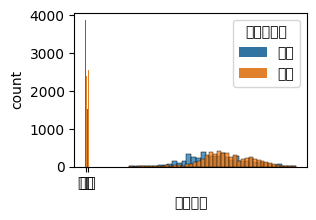

In [ ]:
plt.figure(figsize=(3,2))
sns.countplot(data=df,x='계약구분',hue='재계약분류')
sns.histplot(df_low['대표나이'])
sns.histplot(df_high['대표나이'])

높음은 나이가 ~~고 ~~

In [ ]:
train_col=['아파트 이름','계약구분', '재계약횟수', '거주개월', '아파트 평점', '층', '평형대','입주연도', '거주연도', '월세(원)', '보증금(원)',
       '대표나이', '나이', '성별', '결혼여부', '거주자 수', '퇴거여부', '재계약분류']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
train_cat_cols=['계약구분','결혼여부', '성별', '퇴거여부','아파트 이름']
train_num_cols=['거주개월', '아파트 평점', '층',
                '평형대','입주연도', '거주연도', '월세(원)', '보증금(원)',
       '대표나이', '나이',  '거주자 수']
target_col=['재계약분류']
df=df[train_cat_cols+train_num_cols+target_col].copy()
df=pd.get_dummies(df,columns=train_cat_cols).copy()
train,test=train_test_split(df,test_size=.2)

In [ ]:
scaler=StandardScaler()
train[train_num_cols]=scaler.fit_transform(train[train_num_cols])
test[train_num_cols]=scaler.transform(test[train_num_cols])

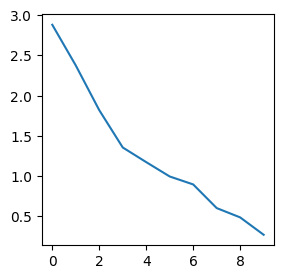

In [ ]:
from sklearn.decomposition import PCA
plt.figure(figsize=(3,3))
pca=PCA(n_components=10)
pca_df=pca.fit_transform(train.drop('재계약분류',axis=1))
plt.plot(pca.explained_variance_)

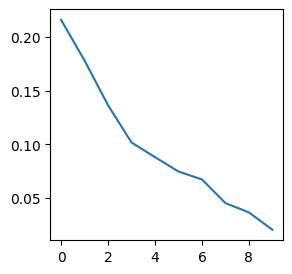

In [ ]:
plt.figure(figsize=(3,3))
plt.plot(pca.explained_variance_ratio_)

3-2

재계약횟수 변수를 종속변수로 하는 회귀 분석을 두 가지 이상의 방법론을 통해 수행하고 최종 모델을 결정하시오. 재계약횟수 이분변수를 종속변수로 하는 분류 분석을 두가지 이상의 방법론을 통해 수행하고 최종 모델을 결정하시오.

In [ ]:
train_y=np.where(train['재계약분류']=='높음',1,0)
test_y=np.where(test['재계약분류']=='높음',1,0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

In [ ]:
rf=RandomForestClassifier()
Lr=LogisticRegression()
lgb=LGBMClassifier()
rf.fit(train.drop('재계약분류',axis=1),train_y)
Lr.fit(train.drop('재계약분류',axis=1),train_y)
lgb.fit(train.drop('재계약분류',axis=1),train_y)

LGBMClassifier()

In [ ]:
rf_preds=rf.predict(test.drop('재계약분류',axis=1))
lr_preds=Lr.predict(test.drop('재계약분류',axis=1))
lgb_preds=lgb.predict(test.drop('재계약분류',axis=1))

In [ ]:
print(f'{accuracy_score(test_y,rf_preds)},{f1_score(test_y,rf_preds)}')
print(f'{accuracy_score(test_y,lr_preds)},{f1_score(test_y,lr_preds)}')
print(f'{accuracy_score(test_y,lgb_preds)},{f1_score(test_y,lgb_preds)}')

0.9753623188405797,0.9765301426599172
0.9541062801932367,0.9552098066949553
0.9801932367149758,0.9809568044588945


<Axes: >

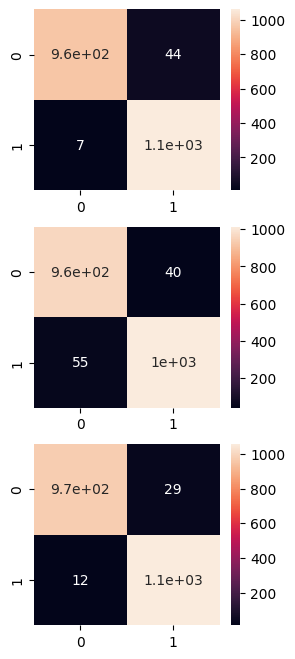

In [ ]:
fig,axs=plt.subplots(3,1,figsize=(3,8))
sns.heatmap(confusion_matrix(test_y,rf_preds),ax=axs[0],annot=True)
sns.heatmap(confusion_matrix(test_y,lr_preds),ax=axs[1],annot=True)
sns.heatmap(confusion_matrix(test_y,lgb_preds),ax=axs[2],annot=True)

In [ ]:
print(confusion_matrix(test_y,rf_preds))
print(confusion_matrix(test_y,lr_preds))
print(confusion_matrix(test_y,lgb_preds))

[[ 958   44]
 [   7 1061]]
[[ 962   40]
 [  55 1013]]
[[ 973   29]
 [  12 1056]]


세개의 모델중 rf와 lgb의 accuracy가 더 높으면서 같고 f1score가 lgbm모델이 더 높으므로 lgbm모델을 최종모델로 선정한다

In [ ]:
df=df_copy.copy()

In [ ]:
train_cat_cols=['계약구분','결혼여부', '성별', '퇴거여부','아파트 이름']
train_num_cols=['거주개월', '아파트 평점', '층',
                '평형대','입주연도', '거주연도', '월세(원)', '보증금(원)',
       '대표나이', '나이',  '거주자 수']
target_col=['재계약횟수']
df=df[train_cat_cols+train_num_cols+target_col].copy()
df=pd.get_dummies(df,columns=train_cat_cols).copy()
train,test=train_test_split(df,test_size=.2)

In [ ]:
train_y=train['재계약횟수']
test_y=test['재계약횟수']

In [ ]:
scaler=StandardScaler()
train[train_num_cols]=scaler.fit_transform(train[train_num_cols])
test[train_num_cols]=scaler.transform(test[train_num_cols])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

In [ ]:
rf_reg=RandomForestRegressor()
lgb_reg=LGBMRegressor()
rf_reg.fit(train.drop('재계약횟수',axis=1),train_y)
lgb_reg.fit(train.drop('재계약횟수',axis=1),train_y)
rf_preds=rf_reg.predict(test.drop('재계약횟수',axis=1))
lgb_preds=lgb_reg.predict(test.drop('재계약횟수',axis=1))

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score

In [ ]:
print(mean_squared_error(test_y,rf_preds))
print(mean_absolute_percentage_error(test_y,rf_preds))
print(r2_score(test_y,rf_preds))

print(mean_squared_error(test_y,lgb_preds))
print(mean_absolute_percentage_error(test_y,lgb_preds))
print(r2_score(test_y,lgb_preds))

0.5068460086956521
0.10362674992389968
0.9502223333699139
0.37173060008274156
0.09657605828335519
0.9634921029865865


3-3 최종 채택한 모델에서 각각 유의하게 작용하는 변수를 확인 하고 설명하시오

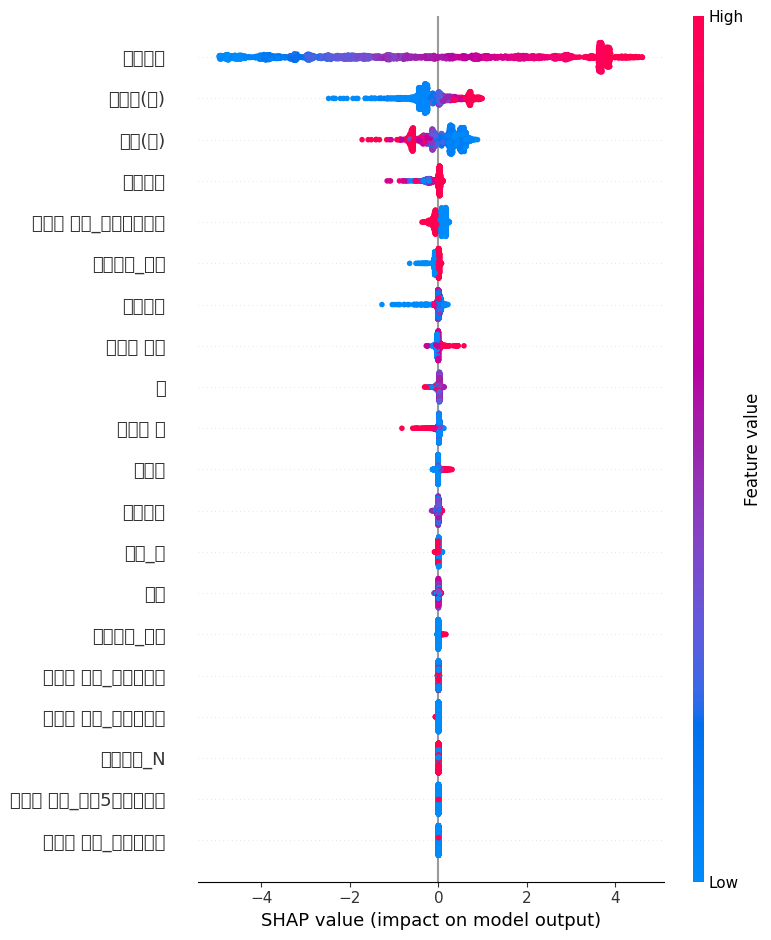

In [ ]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(lgb_reg)
shap_values = explainer.shap_values(test.drop('재계약횟수',axis=1))
fig = shap.summary_plot(shap_values, test.drop('재계약횟수',axis=1))

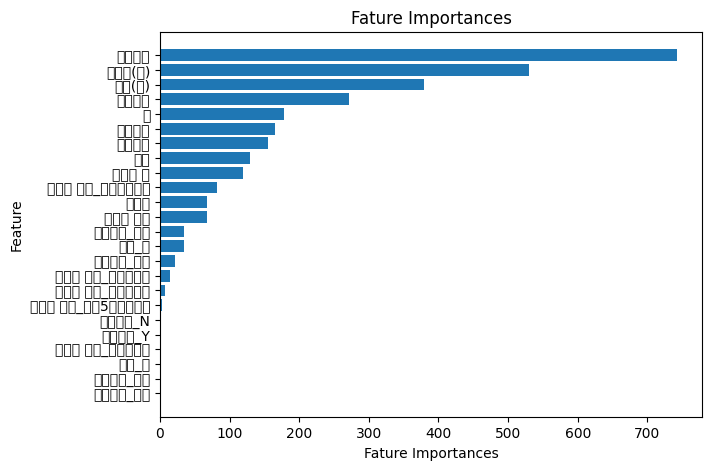

In [ ]:
lgb_reg_imp=pd.DataFrame({'Features':test.drop('재계약횟수',axis=1).columns,'Importances': lgb_reg.feature_importances_})
lgb_imp=lgb_reg_imp.sort_values(by='Importances',ascending=False)
plt.figure(figsize=(7,5))
plt.barh(lgb_imp.Features,lgb_imp.Importances)
plt.xlabel('Fature Importances')
plt.ylabel('Feature')
plt.title('Fature Importances')
plt.gca().invert_yaxis()
plt.show()

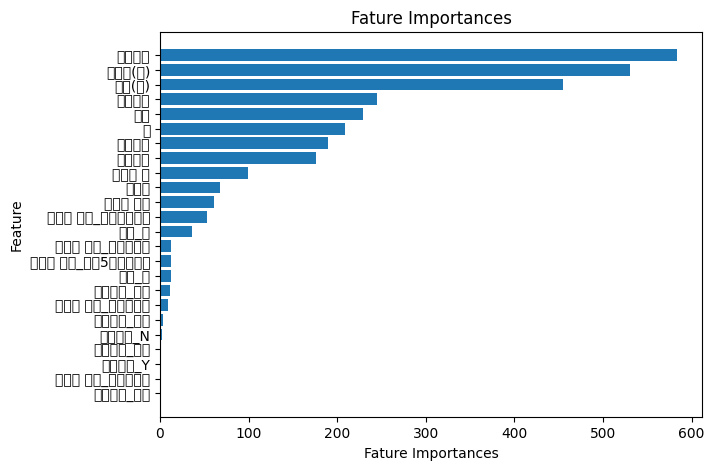

In [ ]:
lgb_imp=pd.DataFrame({'Features':test.drop('재계약횟수',axis=1).columns,'Importances': lgb.feature_importances_})
lgb_imp=lgb_imp.sort_values(by='Importances',ascending=False)
plt.figure(figsize=(7,5))
plt.barh(lgb_imp.Features,lgb_imp.Importances)
plt.xlabel('Fature Importances')
plt.ylabel('Feature')
plt.title('Fature Importances')
plt.gca().invert_yaxis()
plt.show()

회귀모델은 lgbm이 선정되었으며 거주개월이 가장 많은 영향을 주는 변수였다
회귀모델은 lgbm이 선정되었으며 거주개월이 가장 많은 영향을 주는 변수였다

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

4-1 각 회차별로 1번 타자의 출루 (1,2,3루타와 사사구(볼넷, 몸에맞는공))가 있는 경우에 대해 득점이 발생 했는지 확인하고자 한다. 이를 위한 전처리를 수행하라. (단, 첫 번째 혹은 두 번째 타자가 홈런을 친 경우 해당 회차 데이터는 제외한다.)

In [ ]:
df=pd.read_csv('/kaggle/input/adp-29data/raw.githubusercontent.com_Datamanim_datarepo_main_adp_29_p2_.csv')
df=df.astype('str')

In [ ]:
df.head(2)

,game_id,a1_1,a1_2,a2_1,a2_2,a3_1,a3_2,a4_1,a4_2,a5_1,...,a9_2,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,201900016,5,5,5,5,5,5,5,5,5,...,5,0,0,0,0,0,0,0,4,2
1,201900023,6,4,5,5,2,5,1,1,6,...,7,3,0,0,1,0,1,3,1,0


In [ ]:
df.columns

Index(['game_id', 'a1_1', 'a1_2', 'a2_1', 'a2_2', 'a3_1', 'a3_2', 'a4_1',
       'a4_2', 'a5_1', 'a5_2', 'a6_1', 'a6_2', 'a7_1', 'a7_2', 'a8_1', 'a8_2',
       'a9_1', 'a9_2', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9'],
      dtype='object')

In [ ]:
col=['a1_1', 'a2_1',  'a3_1',  'a4_1', 'a5_1',  'a6_1',  'a7_1',  'a8_1', 'a9_1']
col2=['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9']
col3=['a1_2', 'a2_2',  'a3_2',  'a4_2', 'a5_2',  'a6_2',  'a7_2',  'a8_2', 'a9_2']

In [ ]:
for c in col3:
    print(f"df['{c}'],")

df['a1_2'],
df['a2_2'],
df['a3_2'],
df['a4_2'],
df['a5_2'],
df['a6_2'],
df['a7_2'],
df['a8_2'],
df['a9_2'],


In [ ]:
c1=pd.concat([df['a1_1'], df['a2_1'], df['a3_1'], df['a4_1'],
           df['a5_1'], df['a6_1'], df['a7_1'], df['a8_1'], df['a9_1']]
          ,ignore_index=True)
c1=pd.DataFrame(c1)
c1['X1']=0
c1.loc[(c1[0]=='1')|(c1[0]=='2')|(c1[0]=='3')|(c1[0]=='6')|(c1[0]=='8'),'X1']=1
c1.loc[(c1[0]=='4'),'X1']=-1
#1은 출루 0은 출루 X

c2=pd.concat([df['b1'],df['b2'],df['b3'],
df['b4'],df['b5'],df['b6'],df['b7'],df['b8'],df['b9']]
          ,ignore_index=True)
c2=pd.DataFrame(c2)
c1['Y']=0
c2[0]=c2[0].astype('int')
c1.loc[(c2[0]>0),'Y']=1
#1은 득점 0은 득점 X

c3=pd.concat([df['a1_2'],df['a2_2'],df['a3_2'],df['a4_2'],
df['a5_2'],df['a6_2'],df['a7_2'],df['a8_2'],df['a9_2']]
          ,ignore_index=True)
c3=pd.DataFrame(c3)
c1['Y2']=0
c1.loc[(c3[0]=='9'),'Y2']=1
#1은 출루 0은 출루 X

In [ ]:
c1=c1[['X1','Y2','Y']]
c1=c1[c1['X1']!=-1]
c1.reset_index(drop=True,inplace=True)

In [ ]:
train,test=train_test_split(c1)

In [ ]:
lr1=LogisticRegression()
lr1.fit(train['X1'].values.reshape(-1,1),train['Y'])
lr1.coef_

array([[1.59605968]])

In [ ]:
lr2=LogisticRegression()
lr2.fit(train['X1'].values.reshape(-1,1),train['Y2'])
lr2.coef_

array([[3.11094564]])

In [ ]:
print(train['Y'].value_counts())
print(train['Y2'].value_counts())

Y
0    833
1    448
Name: count, dtype: int64
Y2
0    1218
1      63
Name: count, dtype: int64


In [ ]:
smote1=SMOTE(random_state=0)
smote2=SMOTE(random_state=0)
X_smote1,y1_smote=smote1.fit_resample(train['X1'].values.reshape(-1,1),train['Y'])
X_smote2,y2_smote=smote2.fit_resample(train['X1'].values.reshape(-1,1),train['Y2'])

In [ ]:
print(y1_smote.value_counts())
print(y2_smote.value_counts())

Y
0    833
1    833
Name: count, dtype: int64
Y2
0    1218
1    1218
Name: count, dtype: int64


In [ ]:
lr3=LogisticRegression()
lr3.fit(X_smote1.reshape(-1,1),y1_smote)
lr3.coef_

array([[1.52620504]])

In [ ]:
lr4=LogisticRegression()
lr4.fit(X_smote2.reshape(-1,1),y2_smote)
lr4.coef_

array([[3.60746589]])

In [ ]:
preds1=lr1.predict(test['X1'].values.reshape(-1,1))
preds2=lr2.predict(test['X1'].values.reshape(-1,1))
preds3=lr3.predict(test['X1'].values.reshape(-1,1))
preds4=lr4.predict(test['X1'].values.reshape(-1,1))

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

In [ ]:
print('acc')
print(accuracy_score(test['Y'],preds1))
print(accuracy_score(test['Y2'],preds2))
print(accuracy_score(test['Y'],preds3))
print(accuracy_score(test['Y2'],preds4))
print('f1')
print(f1_score(test['Y'],preds1))
print(f1_score(test['Y2'],preds2))
print(f1_score(test['Y'],preds3))
print(f1_score(test['Y2'],preds4))
print('cm')
print(confusion_matrix(test['Y'],preds1))
print(confusion_matrix(test['Y2'],preds2))
print(confusion_matrix(test['Y'],preds3))
print(confusion_matrix(test['Y2'],preds4))

acc
0.6978922716627635
0.9391100702576113
0.6978922716627635
0.7096018735362998
f1
0.5656565656565655
0.0
0.5656565656565655
0.28735632183908044
cm
[[214  64]
 [ 65  84]]
[[401   0]
 [ 26   0]]
[[214  64]
 [ 65  84]]
[[278 123]
 [  1  25]]


5 제품 A의 불량률은 0.03이다. 25개의 제품을 뽑았을 때 3개가 불량일 확률을 구하시오. (소수점 다섯 째 자리에서 반올림)

$P(X=3) = \binom{25}{3} (0.03)^3 (0.97)^{22}$

In [ ]:
from scipy.stats import binom
from math import comb

In [ ]:
print(np.round(binom.pmf(3,25,0.03),5)) #0.03짜리 동전을 25번 던져서 3번나올 확률
print(np.round(comb(25,3)*(0.03**3)*(1-0.03)**22,5))

0.03177
0.03177


6 C사 생산 제품 1000개 중 양품이 600개, D사 생산 제품 500개 중 양품이 200개 이다. 두 회사의 양품률에 차이가 있는지 검정하여라.

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
table=pd.DataFrame({'A':[600,400],'B':[200,300]})
table

,A,B
0,600,200
1,400,300


In [ ]:
chi2_contingency(table)

Chi2ContingencyResult(statistic=52.77087053571428, pvalue=3.7481920789578267e-13, dof=1, expected_freq=array([[533.33333333, 266.66666667],
       [466.66666667, 233.33333333]]))

유의수준 5%에서 A와 B의 양품률이 같다는 귀무가설을 기각하므로 A와 B의 양품률은 차이가 있다고 할수있다

7-1  각 차종 별 범퍼 파손의 정도에 차이가 유의한지 검정하라.

데이터 설명 : 아래 데이터는 a,b,c,d 네 차종 각각 5회 실험 시 범퍼 파손 정도 이다. (단, 각 모집단은 정규분포를 따르며 모집단 간 등분산성을 가정한다.)

In [ ]:
df=pd.read_csv('/kaggle/input/adp-29data/raw.githubusercontent.com_Datamanim_datarepo_main_adp_29_p7.csv')

Null Hypothesis : 각 차종 별 범퍼 파손의 정도의 차이가 하나라도 있다

Alternative Hypothesis : 각 차종 별 범퍼 파손의 정도의 차이가 하나도 없다


In [ ]:
df_a=df[df['name']=='A']
df_b=df[df['name']=='B']
df_c=df[df['name']=='C']
df_d=df[df['name']=='D']

In [ ]:
df.head(2)

,name,ratio
0,A,10.993428
1,A,9.723471


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
bumper_fit=smf.ols(formula='ratio~name',data=df).fit()
sm.stats.anova_lm(bumper_fit,typ=3)

,sum_sq,df,F,PR(>F)
Intercept,596.014269,1.0,188.809457,2.824215e-10
name,236.534027,3.0,24.976953,2.817478e-06
Residual,50.507154,16.0,NaN,NaN


p값이 2.817478e-06로 귀무가설 기각 사후분석시행

7-2 귀무가설을 채택한다면 그 의미를 해석하고, 귀무가설을 기각하였다면 사후분석을 시행하라.¶

In [ ]:
import statsmodels.stats.multicomp as mc

In [ ]:
comp=mc.MultiComparison(df['ratio'],df['name'])
post_hoc_res=comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,5.3934,0.001,2.1785,8.6083,True
A,C,-4.2156,0.0085,-7.4305,-1.0007,True
A,D,-0.7086,0.9207,-3.9235,2.5063,False
B,C,-9.609,0.0,-12.8239,-6.3941,True
B,D,-6.102,0.0003,-9.3169,-2.8871,True
C,D,3.507,0.0302,0.2921,6.7219,True


사후분석 결과  A!=B , A!=C A=D B!=C B!=D C!=D

8 L1,L2,L3 세 개의 생산라인에서 각각 13%, 37%, 50%를 생산하며 각각 1.1% , 2.1%, 3.3% 불량률을 갖는다. 불량 제품이 나왔을 때 L1 라인에서 생산되었을 확률을 구하시오. (소수점 둘째자리에서 반올림)

$P(A|B) = \frac {P(A) \cdot P(B|A)} {P(B)} $

In [ ]:
P_불량=0.13*0.011+0.37*0.021+0.5*0.033
P_A=0.13

In [ ]:
0.13*0.011/P_불량

0.055642023346303505